In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [175]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [176]:
df.shape

(400, 11)

In [177]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'],)

In [178]:
label_encoder=preprocessing.LabelEncoder()
df['US']=label_encoder.fit_transform(df['US'])

In [179]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [180]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [181]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [182]:
label_encoder=preprocessing.LabelEncoder()
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])

In [183]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [184]:
x=df.iloc[:,:12]
y=df['ShelveLoc']

In [185]:
x.drop(['ShelveLoc'],axis=1,inplace=True)
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [186]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [188]:
column=list(df.columns)
column

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [250]:
#splting data into xtrain and ytrain data set
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.2,random_state=40)

In [251]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
85,8.47,125,103,0,304,112,49,13,0,0
69,7.99,127,59,0,339,99,65,12,1,0
203,2.05,131,82,0,132,157,25,14,1,0
379,5.81,125,111,0,404,107,54,15,1,0
261,5.71,121,42,4,188,118,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,4.78,131,32,1,85,133,48,12,1,1
165,0.37,147,58,7,100,191,27,15,1,1
7,11.85,136,81,15,425,120,67,10,1,1
219,10.62,116,79,19,359,116,58,17,1,1


In [252]:
y_train

85     2
69     2
203    0
379    0
261    2
      ..
306    2
165    0
7      1
219    1
326    2
Name: ShelveLoc, Length: 320, dtype: int32

# Build a Decision Tree Clasifier using Entropy

In [253]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

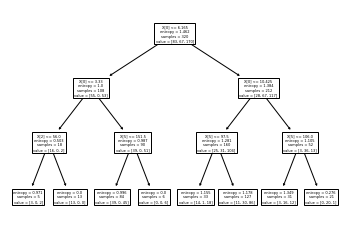

In [254]:
#plot the decision tree
tree.plot_tree(model);

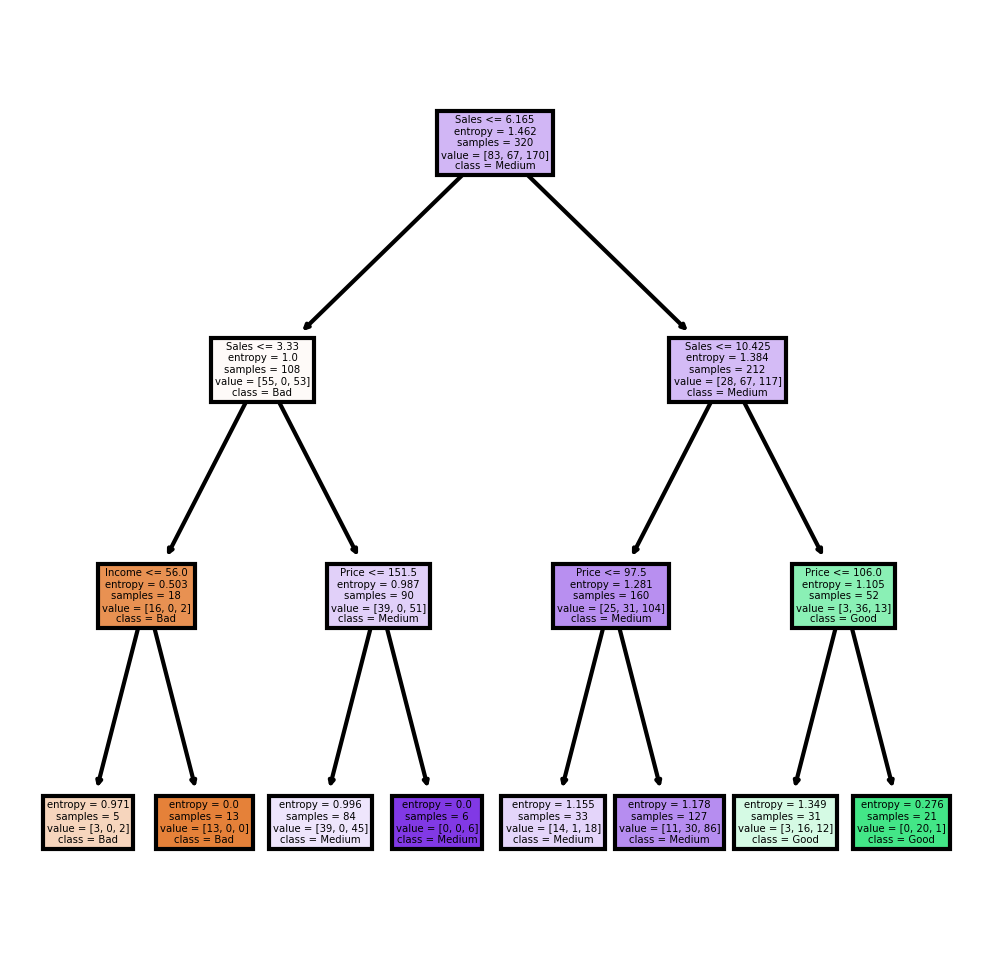

In [255]:
fn=['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US'] #feature name
cn=['Bad', 'Good', 'Medium'] #class name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [256]:
#predicting on test data

#predicting on test dataset
pred=model.predict(x_test)

In [257]:
#getting count of each other
pd.Series(pred).value_counts()

2    63
1    13
0     4
dtype: int64

In [258]:
y_test

132    1
390    2
310    2
3      2
248    2
      ..
361    2
197    2
23     2
54     2
58     0
Name: ShelveLoc, Length: 80, dtype: int32

In [259]:
pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [260]:
#getting the two way table to understand the correct and wrong prediction
pd.crosstab(y_test,pred)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [261]:
np.mean(pred==y_test)

0.625

In [291]:
y_test[4]

0

## 62.5% accuracy measured

# Build decision tree using gini criteria

In [286]:
model_g=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_g.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [287]:
#prediction and computing accuracy
pred1=model_g.predict(x_test)


In [288]:

pred1


array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2])

In [289]:
pd.Series(pred1).value_counts()

2    57
0    13
1    10
dtype: int64

In [290]:
np.mean(pred1==y_test)

0.6375

In [ ]:
63% accuracy